In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
import collections
from collections import Counter

In [3]:

genotypes = pd.read_csv("/content/Combined_2645_Samples_Genotypes.anon.csv", sep="\t")

genotypes.head()

,snp,chr,pos,6198863118_R01C01,8647968039_R01C02,6198863118_R02C01,6198863118_R03C01,8647968039_R02C02,8647968039_R03C02,8647968024_R01C02,...,7384449012_R05C01,7382902015_R05C02,7384449023_R01C01,7384449023_R06C01,7384449023_R04C01,7384449023_R03C01,7382902007_R04C02,7382902005_R06C01,7382902017_R06C01,7382902015_R06C01
0,seq-rs1790315,11,70780791,AA,AA,AG,AA,GG,AA,AA,...,AG,AG,AG,AG,AA,AG,AA,AG,AG,AA
1,imm_1_7684595,1,7684595,GG,GG,GG,GG,GG,GG,GG,...,GG,GG,GG,GG,GG,GG,GG,GG,GG,GG
2,1kg_1_67617298,1,67617298,AG,AG,AG,AG,AG,AG,AG,...,AG,--,AG,AG,AG,AG,--,--,--,--
3,rs3777768,6,12255600,CG,GG,GG,GG,CG,CG,CG,...,GG,CG,CG,GG,GG,CG,CG,CG,GG,CC
4,1kg_1_159802959,1,159802959,AG,AG,AG,AG,AG,AG,AG,...,AG,--,AG,AG,AG,AG,AG,AG,AG,AG


In [4]:
genotypes.shape

(10005, 2648)

We have 196523 genomic features aka SNP's in our dataframe and 2645 patients and 3 columns for SNP ID, chromosome number and chromosome position

In [5]:
#Collects all the snp id's, chromosomes and genomic positions into individual lists
snp_list = genotypes['snp']
chr_list = genotypes['chr']
pos_list = genotypes['pos']
print(len(snp_list), len(chr_list), len(pos_list))

10005 10005 10005


For machine learning we want our data to be in a wide matrix format where the SNP's are represented as columns and patients as rows, so i will transpose the data frame

In [6]:

transpose_df = genotypes.set_index(snp_list).T
transpose_df.reset_index()
transpose_df.head()

snp,seq-rs1790315,imm_1_7684595,1kg_1_67617298,rs3777768,1kg_1_159802959,rs7299872,imm_5_131554635,rs35796161,seq-VH-2915,imm_13_43155437,...,imm_3_120687940,rs1468797,imm_4_123199089,imm_8_11369657,imm_3_50070107,imm_20_44198865,1kg_13_41883568,rs11764033,imm_12_9745664,imm_12_38948655
snp,seq-rs1790315,imm_1_7684595,1kg_1_67617298,rs3777768,1kg_1_159802959,rs7299872,imm_5_131554635,rs35796161,seq-VH-2915,imm_13_43155437,...,imm_3_120687940,rs1468797,imm_4_123199089,imm_8_11369657,imm_3_50070107,imm_20_44198865,1kg_13_41883568,rs11764033,imm_12_9745664,imm_12_38948655
chr,11,1,1,6,1,12,5,6,4,13,...,3,7,4,8,3,20,13,7,12,12
pos,70780791,7684595,67617298,12255600,159802959,55233823,131554635,112058638,123608871,43155437,...,120687940,33169660,123199089,11369657,50070107,44198865,41883568,51345353,9745664,38948655
6198863118_R01C01,AA,GG,AG,CG,AG,AA,AA,AC,CC,GG,...,AA,AA,AG,AG,GG,AA,GG,GG,GG,AA
8647968039_R01C02,AA,GG,AG,GG,AG,AG,AA,CC,CC,GG,...,AA,AG,AA,AG,GG,AG,GG,GG,AG,AA


In [7]:

transpose_df.drop(transpose_df.index[[0,1,2]], inplace=True)
transpose_df.index.name = "Indiv_ID"
transpose_df.head()

snp,seq-rs1790315,imm_1_7684595,1kg_1_67617298,rs3777768,1kg_1_159802959,rs7299872,imm_5_131554635,rs35796161,seq-VH-2915,imm_13_43155437,...,imm_3_120687940,rs1468797,imm_4_123199089,imm_8_11369657,imm_3_50070107,imm_20_44198865,1kg_13_41883568,rs11764033,imm_12_9745664,imm_12_38948655
Indiv_ID,,,,,,,,,,,,,,,,,,,,,
6198863118_R01C01,AA,GG,AG,CG,AG,AA,AA,AC,CC,GG,...,AA,AA,AG,AG,GG,AA,GG,GG,GG,AA
8647968039_R01C02,AA,GG,AG,GG,AG,AG,AA,CC,CC,GG,...,AA,AG,AA,AG,GG,AG,GG,GG,AG,AA
6198863118_R02C01,AG,GG,AG,GG,AG,GG,AA,AA,CC,GG,...,AA,AG,GG,AG,GG,AG,CC,GG,AG,AA
6198863118_R03C01,AA,GG,AG,GG,AG,AG,AA,AA,CC,GG,...,AA,AA,AA,GG,GG,GG,GG,AG,GG,AA
8647968039_R02C02,GG,GG,AG,CG,AG,AG,AA,AA,CC,GG,...,AA,AA,AG,GG,GG,GG,CG,AG,GG,AA


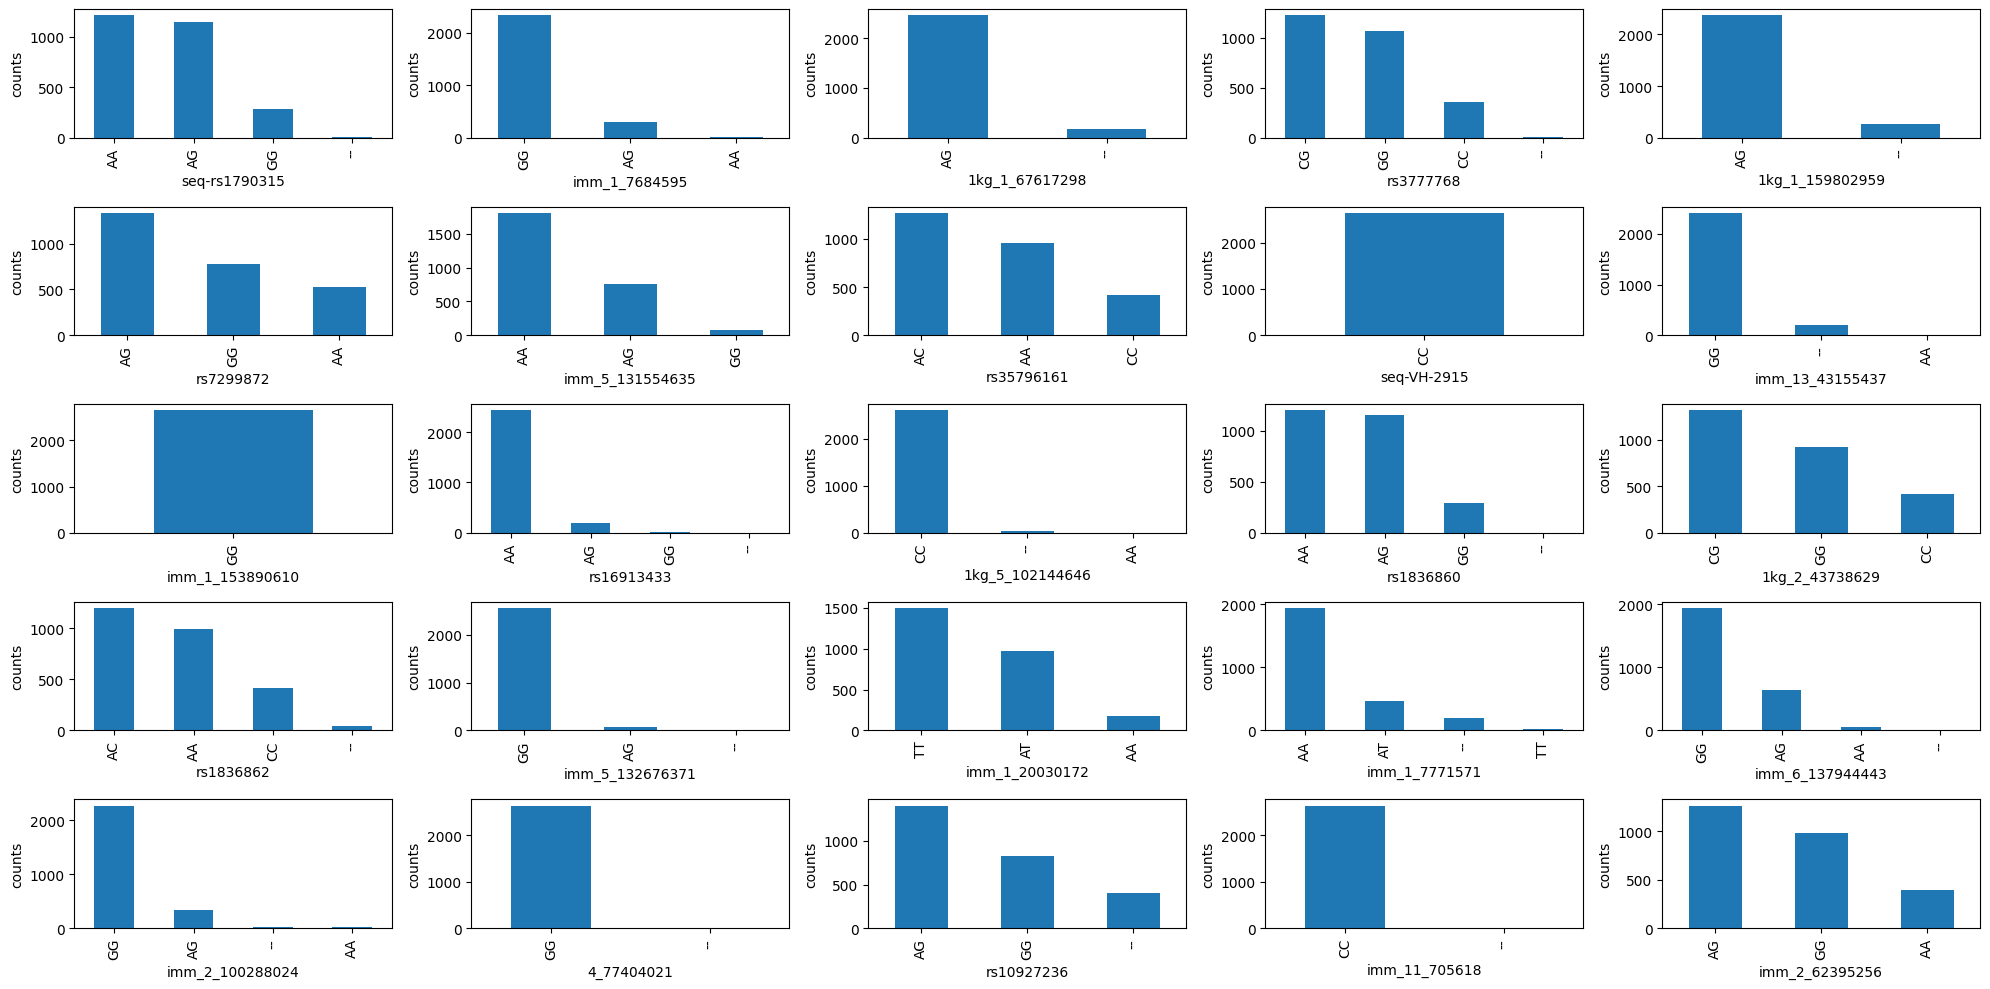

In [8]:

plt.subplots(5,5, figsize = (20,10))

counter = 0

for column in transpose_df.columns[0:25]:

    counter+=1


    plt.subplot(5,5,counter)

    plt.xlabel(column)
    plt.ylabel("counts")


    transpose_df[column].value_counts().plot(kind='bar')

plt.tight_layout()

plt.show()

In [9]:

unique_items = []
for i in tqdm(transpose_df.columns):
    for item in transpose_df[i].unique():
        if item not in unique_items:
            unique_items.append(item)
print(unique_items)
print(len(unique_items))

100%|██████████| 10005/10005 [00:06<00:00, 1602.24it/s]

['AA', 'AG', 'GG', '--', 'CG', 'CC', 'AC', 'TT', 'AT', 'DD', 'ID', 'II', 'DI', nan]
14


In [10]:

situ_1, situ_2, situ_3, situ_4 = [], [], [], []

for i in tqdm(transpose_df.columns):

    if (transpose_df[i] == "--").sum() / len((transpose_df[i] == "--")) > 0.05:

        situ_1.append(i)

    elif transpose_df[i].nunique() == 1:

        situ_2.append(i)


    elif(transpose_df[i].nunique() == 2) & ("--" in transpose_df[i].unique()):

        situ_3.append(i)


    elif any(k in transpose_df[i].unique() for k in ['AA', 'GG', 'AG', 'CG', 'AC', 'CC', 'TT', 'AT']) == False:

        situ_4.append(i)


print(f'# of situ_1 columns: {len(situ_1)}')
print(f'# of situ_2 columns: {len(situ_2)}')
print(f'# of situ_3 columns: {len(situ_3)}')
print(f'# of situ_4 columns: {len(situ_4)}')

100%|██████████| 10005/10005 [00:34<00:00, 292.15it/s]

# of situ_1 columns: 715
# of situ_2 columns: 425
# of situ_3 columns: 1012
# of situ_4 columns: 31


In [11]:

drop_cols_list = np.unique(np.array(situ_1 + situ_2 + situ_3 + situ_4))
print(len(drop_cols_list))

2183


That's a big reduction in our dataset with 42000 columns to be dropped!

In [12]:
#Drop those columns inplace
transpose_df.drop(drop_cols_list, inplace = True, axis = 'columns')
print(transpose_df.shape)

(2645, 7822)


Step 5) Filtering based on `Minor Allele Frequency (MAF) < 0.02`

The most common allele in the population in called the major allele and the second most common is the minor allele. Shown here is a hypothetical example of allele counts at a given genome position.

|Allele|Totals|Allele frequency|Type|
|------|-------|--------|------|
|A|**5000**|5000/ 5820 = 0.86|Major Allele|
|G|**820**|820 / 5820 = 0.14|Minor Allele|

Recall that each biallelic SNP, e.g. AG contains one paternal (viz. 'A') and one maternal allele (viz. 'G'). To estimate allele frequencies, we will sum the occurance of each indiviudal allele across the population for that specific SNP location. Thus all A's and G's in this particular column will be summed up and expressed as a fraction of the total number of single alleles (see table)

In this case, `A` is the major allele and has an allelic frequency of 0.86 and `G` is the minor allele with an allelic frequency of 0.14. We want the minor allele to be at a frequency of atleast 0.02. Otherwise, it means that the major allele is so prevalent that there is essentially only one allele in the population and therefore this particular SNP location does not have a good association with either the healthy or the diseased class.

In [13]:
#Create empty lists for columns, major and minor alleles, counts of major and minor alleles and columns with maf<0.02
all_cols, maj_allele, maj_allele_counts, min_allele, min_allele_counts, maf_cols = [], [], [], [], [], []

#Loop over all columns in the dataframe
for i in tqdm(transpose_df.columns):

    #First create an empty string
    my_string = ""

    #For each SNP pair in a column
    for snp_pairs in transpose_df[i]:
        #add the snp pair to the list
        my_string = my_string + str(snp_pairs)

    #Use the Counter function to count the occurences of each character i.e. allele in the SNP column
    #The counts are returned as a dictionary that looks like this {"A": 3200, "G": 1452, "--":5}
    counts=Counter(my_string)

    #We sort the dictionary to arrange the values in descending order
    sorted_x = sorted(counts.items(), key=lambda kv: kv[1], reverse = True)
    sorted_dict = collections.OrderedDict(sorted_x)

    #Then we pull out the most common SNP
    maj_allele.append(list(sorted_dict.keys())[0])

    #Pull out the frequency of the most common SNP
    maj_allele_counts.append(list(sorted_dict.values())[0])

    #Pull out the second common SNP
    min_allele.append(list(sorted_dict.keys())[1])

    #Pull out the frequency of the second common SNP
    min_allele_counts.append(list(sorted_dict.values())[1])

    #Collect all the columns in a list
    all_cols.append(i)

    #Calculate the Minor allelele frequency (MAF)
    MAF = list(sorted_dict.values())[1] / (list(sorted_dict.values())[1] + list(sorted_dict.values())[0])
    if MAF < 0.02:
        #Collect the low frequency ones
        maf_cols.append(i)

#See the lengths of all these collumns
print(len(maf_cols))
print(len(all_cols))
print(len(maj_allele))
print(len(min_allele))
print(len(maj_allele_counts))
print(len(min_allele_counts))

100%|██████████| 7822/7822 [00:14<00:00, 531.38it/s]

1375
7822
7822
7822
7822
7822


There are 25910 columns that have MAF < 0.02 that we will drop

In [14]:
#Drop the "maf_cols" i.e. the ones with MAF < 0.02
transpose_df.drop(maf_cols, inplace = True, axis = 'columns')
print(transpose_df.shape)

(2645, 6447)


Store the remaining information into a single dataframe called `allele_df`

In [15]:
#We will store the remaining info into a single df called allele df
allele_df = pd.DataFrame([maj_allele, maj_allele_counts, min_allele, min_allele_counts], columns = all_cols)

#Then drop the low MAF ones from allele_df
allele_df.drop(maf_cols, inplace = True, axis = 'columns')

#View the dataframe
allele_df.head()

,seq-rs1790315,imm_1_7684595,rs3777768,rs7299872,imm_5_131554635,rs35796161,rs16913433,rs1836860,1kg_2_43738629,rs1836862,...,imm_3_120687940,rs1468797,imm_4_123199089,imm_8_11369657,imm_3_50070107,imm_20_44198865,1kg_13_41883568,rs11764033,imm_12_9745664,imm_12_38948655
0,A,G,G,G,A,A,A,A,G,A,...,A,A,A,G,G,G,G,G,G,n
1,3573,4964,3350,2896,4372,3190,5065,3552,3145,3177,...,5178,4308,4058,4660,5106,3237,3939,3031,4969,2994
2,G,A,C,A,G,C,G,G,C,C,...,T,G,G,A,-,A,C,A,A,A
3,1709,326,1932,2394,918,2100,219,1736,2145,2027,...,112,982,1230,560,180,2051,1341,2259,321,2280


Step 6) Filtering out columns where missing data i.e `'-'` is the second most common allele.

Some times the second most allele is missing data, which means the population only has a single major allele and no minor alleles. So we will drop those columns as well.

In [16]:
#Create an empty list
missing_minor_allele_list = []

#Loop over all columns in the dataframe
for i in allele_df.columns:

    #if "-" is in the column
    if "-" in allele_df[i].unique():

        #Add that column to the list
        missing_minor_allele_list.append(i)

#See number of columns
print(len(missing_minor_allele_list))

85


In [17]:
#Dropping the columns with missing data as the second most frequent allele
transpose_df.drop(missing_minor_allele_list, inplace = True, axis = 'columns')
print(transpose_df.shape)

#Dropping the columns with missing data as the second most frequent allele
allele_df.drop(missing_minor_allele_list, inplace = True, axis = 'columns')
print(allele_df.shape)

(2645, 6362)
(4, 6362)


Let us check how the distribution of SNPs has changed after all these cleaning steps

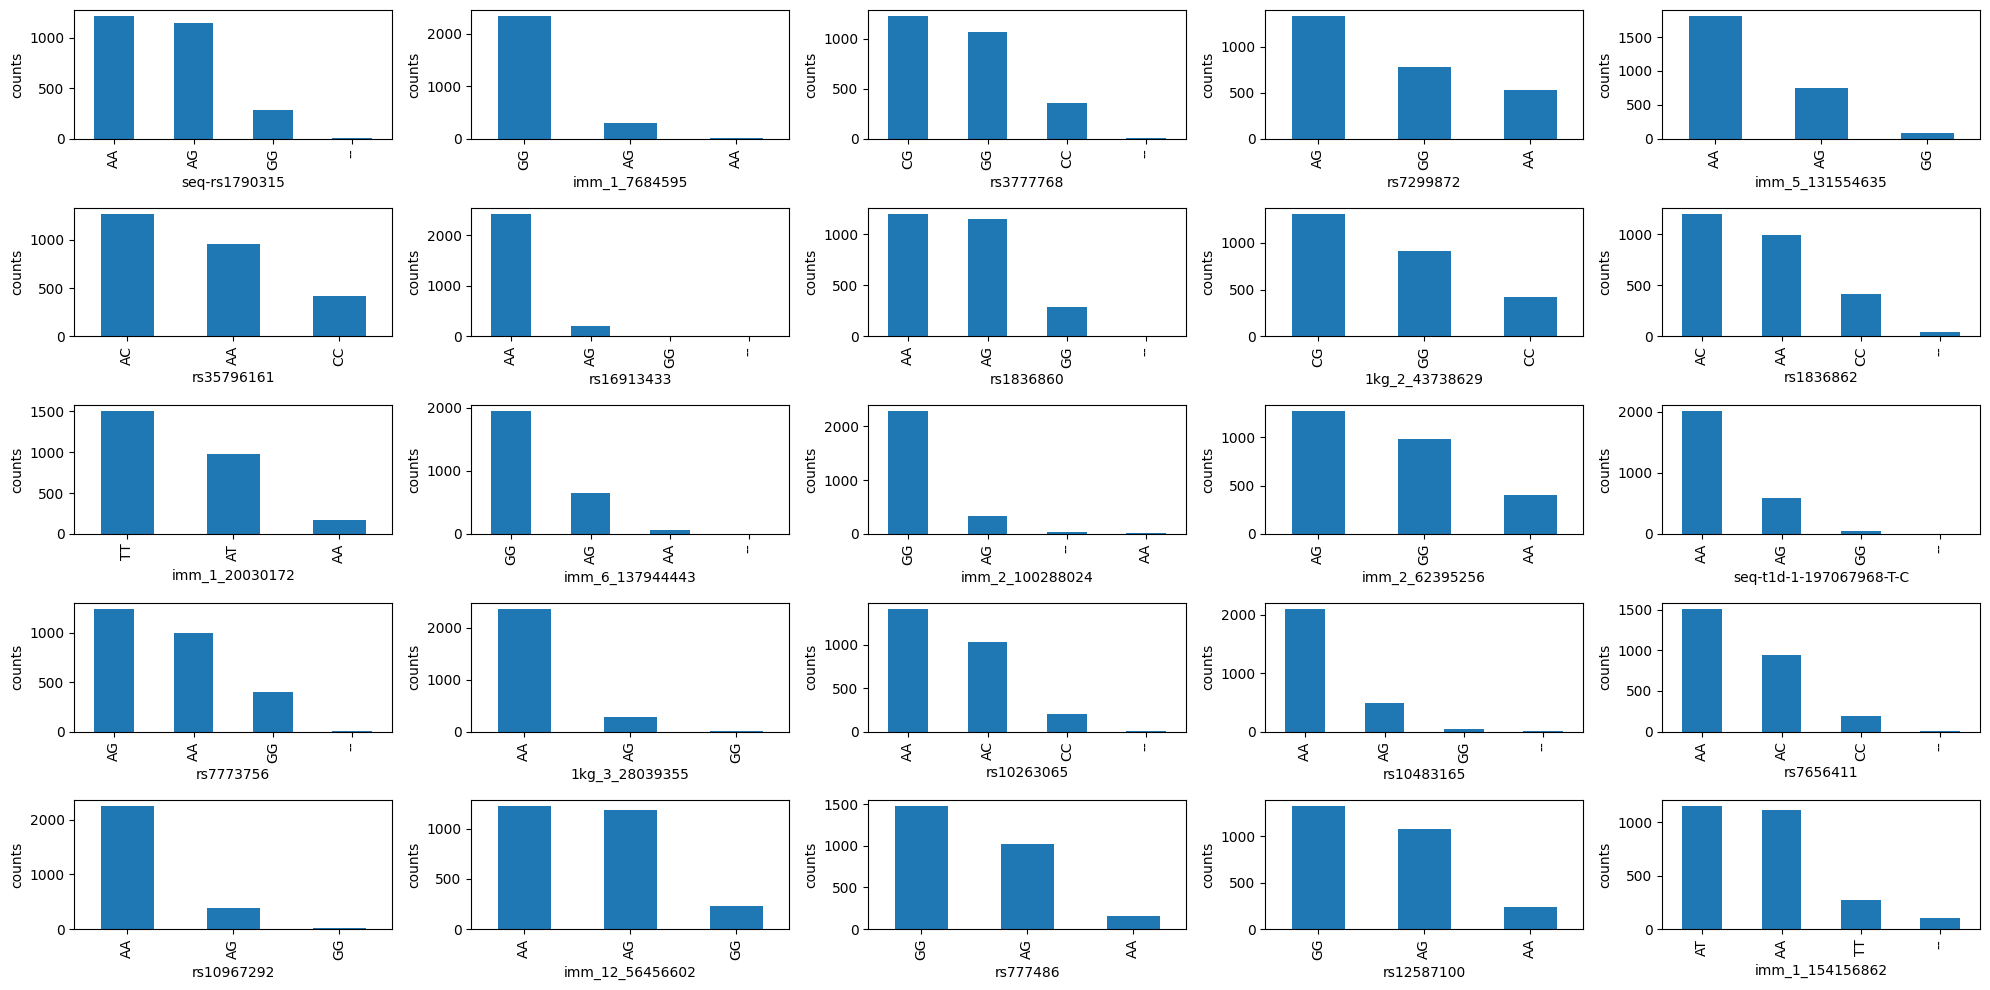

In [18]:
#Setup the subplots object
plt.subplots(5,5, figsize = (20,10))

#Create a counter
counter = 0

#loop over the first few columns in the data frame
for column in transpose_df.columns[0:25]:

    #increment counter
    counter+=1

    #plot the first subplot
    plt.subplot(5,5,counter)

    #label axes
    plt.xlabel(column)
    plt.ylabel("counts")

    #plot the value counts
    transpose_df[column].value_counts().plot(kind='bar')

#Cleanly display the figure
plt.tight_layout()

#Show the figure
plt.show()

**Observations:**
    
Now the distribution looks a lot more even. Most columns have 3 biallelic variants, whose frequency decreases monotonically. However, there are still a few left with missing values, so we will use some additional feature selection methods.

Step 7) Next we want to calculate p-values and keep only those SNPs that have strong associations with healthy or diseased patients. This will be determined by builiding a contingency table that looks something like this:


|Allele|Healthy|Diseased|Totals|
|------|-------|--------|--------|
|A|3200|1800|**5000**|
|G|400|420|**820**|

and then performing chi-squared tests for each snp location to measure the strength of the association. A low p-value indicates that it is unlikely that the association between a single allele and the healthy or diseased class occurs due to random chance. Therefore that allele is likely predictive of healthy or diseased status.

In order to do this, we need to know which patient in the transpose_df is healthy and which patient has IBD. So let's look at the Patients file.

In [21]:
#Read in the patients data
patients = pd.read_csv("/content/Combined_2645_Samples_Genotypes.anon.csv")

#Set index as the individual id
patients = patients.set_index("Indiv_ID")

#View the dataframe
patients.head()

KeyError: "None of ['Indiv_ID'] are in the columns"

This dataframe has the following columns
Family_ID, Dad_ID, Mom_ID (representing family history)
    
Gender: Male / Female using the convention 1=male, 2=female

(see PED file format here https://gatk.broadinstitute.org/hc/en-us/articles/360035531972-PED-Pedigree-format)

Affectation: 1 = Healthy control, 2 = Diseased (CD / UC or IBD)
    
Disease: CD / UC / IBD / Control

Let's see how these are distributed.

In [ ]:
#Setup the subplots object
plt.subplots(1,6, figsize = (20,10))

#Create a counter
counter = 0

#loop over the first few columns in the data frame
for column in patients.columns:

    #increment counter
    counter+=1

    #plot the first subplot
    plt.subplot(1,6,counter)

    #label axes
    plt.xlabel(column)
    plt.ylabel("counts")
    plt.title(patients[column].nunique())

    #plot the value counts
    patients[column].value_counts().plot(kind='bar')

#Cleanly display the figure
plt.tight_layout()

#Show the figure
plt.show()

**Observations:**

Family_ID: There are 2645 unique values. So this seems to be unnecessary information.

Dad_ID: There are only 12 unique values, and most of these are 0, which means this information is missing for most individuals.

Mom_ID: There are only 12 unique values, and most of these are 0, which means this information is missing for most individuals.

Gender: There are only 2 unique values Male / Female using the convention 1=male, 2=female. There's an almost even balance of male and female.

Affectation: There are only 2 unique values 1 = Healthy control, 2 = Diseased (CD / UC or IBD). There is a slight imbalance here, with ~1600 healthy and ~1000 diseased samples.

Disease: There are 6 unique values, but many of them refer to the healthy control class and are just formatted differently. In reality there are only 4 classes. CD / UC / IBD / Control

For this project, I will only try to predict IBD / Non-IBD so we can roll up all the CD / UC / IBD cases into a single class. Since this information is already present in the `Affectation` column, we can get rid of the `Disease` column

In [ ]:
#drop unnecessary columns
patients.drop(["Family_ID","Dad_ID", "Mom_ID", "Disease"], axis='columns', inplace = True)

#View the dataframe
patients.head()

I will be recoding Gender and Affectation as binary variables with new encoding:

||Old values|New Values|
|-----|----------|----------|
|Gender| `Male = 1`, `Female = 2`|`Male = 1`, `Female = 0`|
|Affectation| `Control = 1`, `Diseased = 2`|`Control = 0`, `Diseased = 1`|

In [ ]:
#Recoding Gender and Affectation as binary encoded 0,1 variables
patients["Gender"] = np.where(patients["Gender"] == 2, 0, patients["Gender"])
patients["Affectation"] = np.where(patients["Affectation"] == 2, 1, 0)
patients.head()

and append this information to transpose_df so that we have a single dataframe

In [ ]:
#Create a single dataframe
full_df = pd.concat([transpose_df, patients], axis=1, ignore_index=False)
full_df.head()

Separate the dataframes into healthy and diseased patients

In [ ]:
healthy_df = full_df[full_df["Affectation"] == 0]
diseased_df = full_df[full_df["Affectation"] == 1]
print(healthy_df.shape)
print(diseased_df.shape)

We did all these manipulations because Step 7) Next we want calculate p-values and keep only those SNPs that have strong associations with healthy or diseased patients. So let's create two functions that create contigency tables that compare allele counts from healthy and diseased patients using a chi-squared test.

In [ ]:
#Takes a single column as input
def create_healthy_counts_df(column):
    key_list, count_list = [], []

    #Create an empty string
    my_string = ""

    #Add all snp_pairs in that column into a single string
    for snp_pairs in healthy_df[column]:
        my_string = my_string + str(snp_pairs)

    #Use the Counter function to count the occurences of each character i.e. allele in the SNP column
    #The counts are returned as a dictionary that looks like this {"A": 3200, "G": 1452, "--":5}
    counts=Counter(my_string)

    for key in counts.keys():
            #If the key is DNA letter
            if key in ["A", "C", "G", "T"]:
                #then keep a count
                key_list.append(key), count_list.append(counts[key])
            #otherwise skip this
            else:
                continue

    #return the contigency table as a dataframe
    blah = pd.DataFrame([key_list, count_list]).T.set_index(0)
    blah.columns = ["healthy"]
    return blah

In [ ]:
#Takes a single column as input
def create_diseased_counts_df(column):
    key_list, count_list = [], []

    #Create an empty string
    my_string = ""

    #Add all snp_pairs into a single string
    for snp_pairs in diseased_df[column]:
        my_string = my_string + str(snp_pairs)

    #Use the Counter function to count the occurences of each character i.e. allele in the SNP column
    #The counts are returned as a dictionary that looks like this {"A": 3200, "G": 1452, "--":5}
    counts=Counter(my_string)

    for key in counts.keys():
            #If the key is DNA letter
            if key in ["A", "C", "G", "T"]:
                #then keep a count
                key_list.append(key), count_list.append(counts[key])
            #otherwise skip this
            else:
                continue

    #return the contigency table as a dataframe
    blah = pd.DataFrame([key_list, count_list]).T.set_index(0)
    blah.columns = ["diseased"]
    return blah

Then run chi-squared tests for each snp location which outputs a p-value for each association.

In [ ]:
from scipy.stats import chi2_contingency

p_values_list, columns_list = [], []
counter = 0

#loop over all the columns in the full_df except the last 2
for my_columns in tqdm(full_df.columns[:-2]):

    #Get healthy counts and store them in a dataframe
    my_df = create_healthy_counts_df(my_columns)

    #Get diseased counts
    my_df2 = create_diseased_counts_df(my_columns)

    #create concat_df to create a contingency table
    concat_df = pd.concat([my_df, my_df2], axis = 1)

    #Sometimes we will get NA values, since we are ignoring missing values in the create_healthy_counts_df and the create_diseased_counts_df functions
    #These missing values need to be handled in cases where missing values are the second most common alleles in concat_df.
    #By replacing NA values with a 1 we avoid getting weird results when we perform the chi-squared tests later
    concat_df.fillna(1)

    #add name to columns_list
    columns_list.append(my_columns)

    #Calculate chi-squared test p-values
    stat, p, dof, expected = chi2_contingency(concat_df)
    p_values_list.append(p)

#Create a single df with all the p-values
pval_df = pd.DataFrame(p_values_list, columns = ["p_values"])
print(pval_df.shape)

Step 7) Applying a p-value cut-off (default is < 1e-7)

**While all the other steps are mandatory, this step is unique since this is tunable. The default threshold is 1e-7, but we can increase or decrease this threshold to retain more or less features.**

In [ ]:
#collect the indices of the columns we want to keep
indices_to_keep = pval_df[pval_df["p_values"] < 1e-7].index
print(len(indices_to_keep))

That was a massive change! We went from having 126682 columns to just 413 SNP columns that have a strong association with either the healthy or diseased class. We can see how this number would change if we increased or decreased our p-value cut-off

In [ ]:
#Set the range
p_val_range = np.arange(-15,0,1)

#Create empty list
cols_to_keep = []

#loop over range
for i in p_val_range:

    #Keep those indexes where p_value is less than the value specified by 10.0**i
    idx_to_keep = pval_df[pval_df["p_values"] < 10.0**i].index

    #append length of idx_to_keep object to cols_to_keep list
    cols_to_keep.append(len(idx_to_keep))

#Plot Number of columns retained vs p_value cutoff
plt.figure()
plt.bar(p_val_range, cols_to_keep, log=True, color='orange')
plt.xticks(p_val_range)
plt.axhline(413, linestyle = "--", c="black")
plt.xlabel("p_value cutoff 10^x")
plt.ylabel("Number of columns retained")
plt.show()

The trend is clear. **lower p-value cut-off = higher stringency = less features retained**.
The 10^-7 cutoff was chosen for a couple of reasons.

1) It keeps the number of features low (only 413), which helps with run-time for downstream model fitting steps.

2) Since we ran > 100,000 chi-squared tests earlier, we need to account for the fact that we're running so many tests. If we use the Bonferroni correction

![image.png](attachment:47567222-7c85-4ba9-a8d9-5ae2d612c29c.png)

then our p_value threshold becomes 0.05 / 100,000 = 5e-7. In order to keep this more stringent I picked 1e-7.

In [ ]:
#Using the indices figure out which columns need to be kept from the full_df
columns_to_keep = full_df.columns[indices_to_keep]

Now we store the filtered p-values in a new dataframe called clean_df

In [ ]:
#Create a clean df with these features
clean_df = full_df[columns_to_keep]
clean_df.shape

In [ ]:
#Attach the gender and the affectation information to clean_df
clean_df = pd.concat([clean_df, patients], axis=1, ignore_index=False)
clean_df.head()

**Manhattan plot**

In order to visualize the retained SNPs vs the discarded SNPs we will use a Manhattan plot. The following tutorial was very helpful while building this plot https://www.youtube.com/watch?v=Ej4FkgLOvQ0&ab_channel=PythonforBiologists

In [ ]:
#Create a new dataframe with snps and p_values
some_df = pd.concat([pd.Series(columns_list), pval_df], axis= 'columns')

#rename columns to have appropriate names
some_df.columns = ["snp", "p_values"]

some_df.head()

In [ ]:
#Create another dataframe that also contains the chr and position information from the genotypes dataframe by performing a left join
plot_portion = pd.merge(some_df, genotypes.iloc[:,0:3], on="snp", how = 'left')

#add a column by calculating -logP
plot_portion["-10logP"] = -np.log10(plot_portion["p_values"])

#Convert the chr column to type string
plot_portion["chr"] = plot_portion["chr"].astype(str)

plot_portion

In [ ]:
plot_portion["chr"].unique()

We want to sort the dataframe plot_portion using the `chr` column for plotting.

However, when sorting this list alphabetically ascending, we end up sorting in the order

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',

'2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',

'X','XY', 'Y']

which is not quite what we want. So we will do some wrangling to sort the dataframe correctly.

In [ ]:
#First separate the numerical chromosomes from the non-numerical chromosomes

#Non-numeric
list1 = ["X", "Y", "XY"]
#Numeric
list2 = list(plot_portion[~plot_portion["chr"].isin(list1)]["chr"].unique())

#Sort the numbers using the key parameter inside the sort function which first converts to int before sorting
list2.sort(key=int)

#Then add the two lists together
list2 = list2 + list1

print(list2)

This ordering looks more like what we need. In order to sort the dataframe with this custom ordering, we will first create a new dictionary with the ordered elements from list2 as `keys` and integers from 1 - 15 as `values`.

In [ ]:
numbers_list = np.arange(1,26)

#create a new dictionary with the ordered elements from list2 as keys and integers from 1 - 15 as values
my_dict = dict(zip(list2, numbers_list))

#view my_dict
print(my_dict)

then we will sort using this custom order by using a lambda function

In [ ]:
#sort values first by "chr" using custom ordering, which is accomplished by key=lambda x: x.map(my_dict)
#the second sort is by "pos"
#then we only retain 4 columns ["snp", "chr", "pos", "-10logP"]
plot_portion = plot_portion.sort_values(by=['chr', "pos"], key=lambda x: x.map(my_dict))[["snp", "chr", "pos", "-10logP"]]
plot_portion

Now that we've sorted the dataframe the correct way, we will add a column called cum_pos which keeps a running count of the position. This will later be used as the X-axis of our Manhattan plot.

In [ ]:
running_pos = 0
cumulative_pos = []

#loop through each chromosome in the plot_portion.groupby("chr") object, and for each chromosme find the max position for that chromosome.
#Once the max is found, add it to the values in the "pos" columns. The effect of this is that the chromosomes getting ordered in a line.
#first you line up all the positions in chromosome 1 followed by all the positions in chromosome 2 followed by chromosome 3 etc...
for chromosome, group_df in plot_portion.groupby("chr"):
    cumulative_pos.append(group_df["pos"] + running_pos)
    running_pos += group_df["pos"].max()

#Add a column to plot_portion that has all the cumulative positions.
plot_portion["cum_pos"] = pd.concat(cumulative_pos)
plot_portion

Lastly, we define a colorgroup where all the values that are >7 in the "-10logP" columns are labelled with A, otherwise labelled with B. We use this column later to color points in the Manhattan plot.

In [ ]:
plot_portion["colorgroup"] = np.where(plot_portion["-10logP"] > 7, "A", "B")
plot_portion

Finally we are ready to build the Manhattan plot!

In [ ]:
#Set up the figure object
plt.figure()

#sns.relplot builds a scatter plot in seaborn. by setting g = sns.relplot, we can then access various elements of the plot using syntax like
#g.ax.set_xlabel("Chromosome"), which changes the x-axis label
g = sns.relplot(data = plot_portion, #Data is the dataframe
            x = "cum_pos", #X-axis
            y = "-10logP", #Y-axis
            hue = "colorgroup", #Set colors of points using the colorgroups we defined earlier
            palette = ["pink","gold"], #color the groups A and B with gold and pink respectively
            aspect = 3, #This setting makes the plot 3x as wide as it is tall
            s=50, #sets dot size to 50
            linewidth = 0, #removes outlines of the dots
            legend = None) #no legend

#re-label x and y-axis
g.ax.set_xlabel("Chromosome", fontsize = 20)
g.ax.set_ylabel("-10logP", fontsize = 20)


#define where we want the x labels to go. We align the labels correctly by placing each label at the median value of that chromosome,
#which places the label at the center of the region that each chromosome occupies
x_label_locations = plot_portion.groupby(["chr"]).median()["cum_pos"]
g.ax.set_xticks(x_label_locations)

#Set labels equal to the name of the chromosome
g.ax.set_xticklabels(plot_portion["chr"].unique())

#draw a horizontal line at the cut-off point
plt.axhline(7, linestyle = '--', c='black', linewidth = 2)

#set y axis limits to scale the plots correctly
plt.ylim(0,20)

plt.title("Manhattan plot", fontsize = 20)
#show the plot
plt.show()

and there it is! A beautiful Manhattan plot! The gold dots represent SNPs that were retained after all the filtering, while pink dots were not retained.

Let us check agains how the distribution of SNPs has changed after all these cleaning steps

In [ ]:
#Setup the subplots object
plt.subplots(5,5, figsize = (20,10))

#Create a counter
counter = 0

#loop over the first few columns in the data frame
for column in clean_df.columns[0:25]:

    #increment counter
    counter+=1

    #plot the first subplot
    plt.subplot(5,5,counter)

    #label axes
    plt.xlabel(column)
    plt.ylabel("counts")

    #plot the value counts
    clean_df[column].value_counts().plot(kind='bar')

#Cleanly display the figure
plt.tight_layout()

#Show the figure
plt.show()

**Observations:**
    
Now the distribution looks a lot more even. Most columns have 2-3 biallelic variants, whose frequency decreases monotonically. However, there are still a few left with missing values.

For model fitting we need to convert the genomic labels that are letters, `A,C,G,T` into numbers. We will do this using One-Hot encoding.

In [ ]:
#Use the get_dummies method for one hot encoding
dummies_df = pd.get_dummies(clean_df)
dummies_df.head()

Let's put the "Affectation" column at the end of the dataframe

In [ ]:
#pops out the "affectation" column and saves it as a new dataframe
affectation_df = dummies_df.pop("Affectation")

#add back the column at the end
dummies_df["Affectation"] = affectation_df

#View
dummies_df.head()

Step 8) As a last step, we want to drop all columns that contain one hot encoded values corresponding to  `"--"`, since they don't carry meaningful biological information

In [ ]:
#Collect all the column names
dummies_cols = pd.Series(dummies_df.columns)

#Create a new dataframe with those column names
no_dashes_df = pd.DataFrame(dummies_cols)

#Split the column on the "_" character from the right and save the split column names into 2 new columns
no_dashes_df[["1","2"]] = no_dashes_df[0].str.rsplit(pat = "_", n=1, expand = True)
no_dashes_df

In [ ]:
#drop the rows that have dashes in the name
drop_dashes_columns = no_dashes_df[no_dashes_df["2"]== "--"][0]
drop_dashes_columns

In [ ]:
#Then drop those columns from dummies_df
dummies_df.drop(drop_dashes_columns, inplace = True, axis = 'columns')
dummies_df.head()

Voila! Our cleaning process is complete! We now have a dataframe that can be used for modeling. Let's save this dataframe to file so we can use it later.

In [ ]:
dummies_df.to_csv("GWAS_analysis_OHE.csv", index=True)